# import each week of data in

In [1]:
import pandas as pd

df = pd.read_csv("mahomes.csv")

# new approach -- look at data week by week
train set is previous weeks
test set is current week

Based on EDA, we care about 3 QB stats:
1. Completions
2. Passing Yards
3. Passing TDs
4. Rushing Yards
4. Rushing TDs

We will run linear regression on these 3 stats with the target being points scored.
Weights will start out at 1/3 and adjust based on accuracy.



In [2]:
df.describe()
df

x_stats = df.drop(['WEEK', 'OPP', 'ATT', 'PCT', 'AVG', 'INT', 'RAT', 'ATT.1', 'AVG.1', 'FPTS/G', 'FPTS'], axis=1)
y_points = df.iloc[:,15]

train_x = x_stats[6:]
train_y = y_points[6:]

test_x = x_stats[:5]
test_y = y_points[:5]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(train_x, train_y)
mean_squared_error(test_y, reg.predict(test_x))

x_stats

,CMP,YDS,TD,YDS.1,TD.1
0,30,360,5,5,0
1,24,235,2,-1,0
2,20,262,1,26,0
3,23,249,3,34,0
4,29,292,4,28,0
5,25,338,2,21,0
6,25,423,3,0,0
7,43,446,1,63,1
8,26,331,4,39,0
9,20,329,3,23,0


In [3]:
# use lasso or ridge instead of doing it myself, usually get better results
# lasso

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)    #alpha is size of threshold, total weight of abs val of our features can't exceed alpha
lasso.fit(train_x, train_y)
mean_squared_error(test_y, lasso.predict(test_x))

33.44164768392936

In [4]:
# Ridge

#from sklearn.linear_model import Ridge

#ridge = Ridge(alpha=10)    #alpha is size of threshold, total weight of abs val of our features can't exceed alpha
#ridge.fit(train_x, train_y)
#mean_squared_error(test_y, ridge.predict(test_x))

In [5]:
# divide data set into training, validation, and test
# Grid Search -- create grid of alpha and beta hyperparams
# Cross validation -- move validation portion around while training on data set

#from sklearn.model_selection import GridSearchCV  #GriSearchCV becomes regressor instead of ridge
#params = {'alpha': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100, 1000]}
#ridge = Ridge()
#reg = GridSearchCV(ridge, params, scoring='neg_mean_squared_error',
#                  cv=5)

#reg.fit(train_x, train_y)

In [6]:
#reg.best_params_

In [7]:
#reg.best_score_

In [8]:
#mean_squared_error(test_y, reg.predict(test_x))

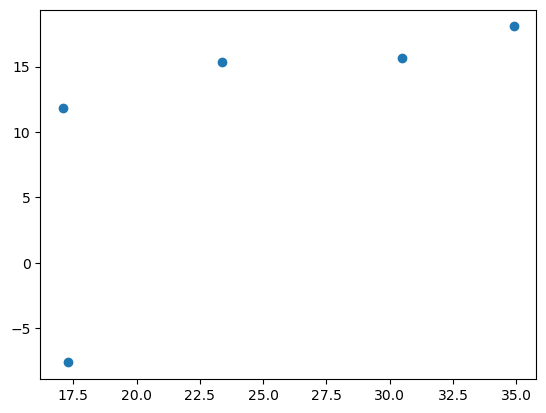

In [17]:
import matplotlib.pyplot as plt
plt.scatter(test_y, reg.predict(test_x))

In [15]:
reg.predict(test_x)

array([18.06111277, -7.61117519, 11.81509581, 15.35875775, 15.66614148])

In [11]:
y_points

0     34.90
1     17.30
2     17.08
3     23.36
4     30.48
5     19.62
6     26.92
7     34.14
8     31.14
9     27.46
10    18.40
Name: FPTS, dtype: float64

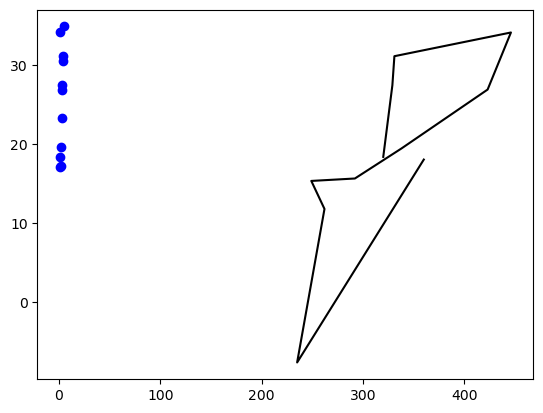

In [30]:
plt.scatter(df.TD, df.FPTS, color='blue')
plt.plot(df.YDS, reg.predict(x_stats), color='black')

plt.show()